<a href="https://colab.research.google.com/github/neethipoonacha/EIP/blob/master/Copy_of_Session2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Not an ideal network**

install keras 
pip -  package management system from anaconda


In [1]:
#install keras 
#pip -  package management system from anaconda

# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


import libraries and modules
import numpy - for reproducing results from the result set
import Sequential - for feed forward of linear stack of neural network layers
import Flatten - core layers of keras
import Convolution2D - convolutional layers that will help  efficiently train on image data
import np_utils - utitlities to transform data
import mnist - libraries to import datasets

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

Load image data from MNIST data from  - https://s3.amazonaws.com/img-datasets/mnist.npz

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


There are 6000 samples with 28*28 resolution each .The first sample is plotted here  

(60000, 28, 28)


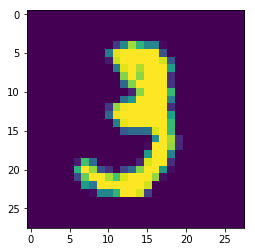

In [6]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
#plt.imshow(X_train[10])

Preprocess input data for keras 
RGB images have a depth of 3 . minst images have a depth of 1 .
explictly mentioning to process the data and to transform  dataset from having shape (n, width, height) to (n, depth, width, height). 

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

convert our data type to float32 and normalize our data values to the range [0, 1].

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

The 10 different classes are represented as a single 1-dimensional array 

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

The y_train and y_test data are split into 10 distinct class labels

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [11]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
The input shape parameter should be the shape of 1 sample corresponding to  the (depth, width, height) of each digit image 
here it is 28*28

The first 3 params(32, 3, 3) represent 
	the no of filters = 32
	the size of the kernel(no of rows and no of col) =3, 3
	step size is (1,1) by default.
	
After this add more layers to the module
MaxPooling2D = to reduce the number of parameters in our model by sliding a 2x2 pooling filter across the previous layer 
and taking the max of the 4 values in the 2x2 filter 
Flatten = flattened convolution layers to  1-dimensional

Receptive field is added inline

In [13]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#26*26 *32 *64
model.add(Convolution2D(64, 3, 3, activation='relu'))
#24*24 *64 *128
model.add(Convolution2D(128, 3, 3, activation='relu'))
#11 * 11 * 128
model.add(MaxPooling2D(pool_size=(2, 2)))
#9*9*128
model.add(Convolution2D(256, 3, 3, activation='relu'))
#7*7*128 * 512
model.add(Convolution2D(512, 3, 3, activation='relu'))
#5*5*512 * 1024
model.add(Convolution2D(1024, 3, 3, activation='relu'))
#3*3*1024 * 2048
model.add(Convolution2D(2048, 3, 3, activation='relu'))
#1*1*2048 * 10
model.add(Convolution2D(10, 3, 3))

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Up

compile and run the model with loss function categorical_crossentropy and optimizer = adam

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Fit the training data by adding the batch size ( create 32 batches with each batch having one feature each)
and run it for 10 epochs(iterations of back forth of entire data set)

In [15]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 222s 4ms/step - loss: 0.1533 - acc: 0.9517
Epoch 2/10
60000/60000 [==============================] - 216s 4ms/step - loss: 0.0575 - acc: 0.9838
Epoch 3/10
60000/60000 [==============================] - 216s 4ms/step - loss: 0.0436 - acc: 0.9874
Epoch 4/10
60000/60000 [==============================] - 216s 4ms/step - loss: 0.0335 - acc: 0.9903
Epoch 5/10
60000/60000 [==============================] - 216s 4ms/step - loss: 0.0315 - acc: 0.9910
Epoch 6/10
60000/60000 [==============================] - 216s 4ms/step - loss: 0.0247 - acc: 0.9930
Epoch 7/10
60000/60000 [==============================] - 216s 4ms/step - loss: 0.0203 - acc: 0.9940
Epoch 8/10
60000/60000 [==============================] - 216s 4ms/step - loss: 0.0209 - acc: 0.9938
Epoch 9/10
60000/60000 [==============================] - 216s 4ms/step - loss: 0.0181 - acc: 0.9952
Epoch 10/10
60000/60000 [==============================] - 216s 4ms/step - loss: 0.0186 - a

Evaluate the model on the test data 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

print the accuracy of prediction

In [17]:
print(score)

[0.037161055194754135, 0.9909]


In [0]:
y_pred = model.predict(X_test)

In [19]:
print(y_pred[:9])
print(y_test[:9])

[[1.0678010e-15 2.4273165e-17 2.2192521e-12 1.0564976e-13 3.0823614e-19
  5.4906011e-14 4.6121691e-22 1.0000000e+00 4.1741416e-16 4.4882267e-14]
 [5.8488095e-17 8.5458624e-14 1.0000000e+00 8.7380693e-17 2.5863501e-17
  9.7539151e-21 4.0372022e-18 5.3718133e-19 1.9193254e-15 4.1795421e-24]
 [9.3215846e-10 9.9999213e-01 4.7628756e-08 1.7100713e-11 4.7173403e-06
  4.8468041e-07 2.9320049e-09 1.3468880e-06 1.3550202e-06 1.4894996e-09]
 [9.9999738e-01 1.1190211e-12 1.8150544e-09 3.5256686e-11 3.1707170e-09
  2.0544992e-09 2.6300854e-06 3.0684757e-11 3.6500179e-08 1.2442791e-08]
 [1.8478637e-20 6.3502325e-23 4.9694939e-21 3.0068610e-19 1.0000000e+00
  1.1362003e-22 6.8750151e-24 8.4680429e-22 3.6684226e-17 8.0445286e-21]
 [7.5735432e-11 9.9999702e-01 2.5066623e-07 2.0984482e-12 1.2769655e-06
  2.9827394e-09 1.3375910e-10 7.0303025e-07 7.2158866e-07 2.6183167e-10]
 [2.3128736e-14 3.5001977e-12 6.3464130e-11 5.7426720e-13 9.9999881e-01
  1.5032320e-09 3.2716985e-11 5.6331947e-07 6.0530590e-07 

Issues with the model


1 . Will need to add a dropput of model.add(Dropout(0.5)) to remove noise and overfitting the data 
2 . Remove RELU from last layer
